# Multi-Period Binomial Asset Pricing Model

Consider a multiperiod binomial asset model for an asset S with N periods. Under this particular model, we have the following assumptions:
- the initial price of the asset is $S_0 = 1$
- under the risk-neutral measure, the asset price at period $j$ is $S_j = (1+v)S_{j-1}$ with probability $1/2$, with $0 < v < 1$; and 
- the interest rate associated with borrowing/lending currency for a single time period is 0.  

## Import Libraries

In [1]:
# Import necessary libraries 

import numpy as np 
import matplotlib.pyplot as plt 

#### Implement a function which, given v, and the strike K of a European call option on the asset S, expiring after N periods, returns its value V. 

In [2]:
def european_call_option_value(v, K, S, N): 
    u = 1 + v
    d = 1 - v
    p = 0.5  # Probability of up move

    # Calculate risk-neutral probability (not necessary since p is given and r = 0)
    q = p  # Since r = 0, we don't need to adjust for risk-neutral probabilities

    # Initialize an array to hold the stock prices at maturity
    stock_prices_at_maturity = np.array([S * (u ** (N - i)) * (d ** i) for i in range(N+1)])

    # Calculate the option payoffs at maturity
    option_payoffs = np.maximum(stock_prices_at_maturity - K, 0)
    
    # Calculate the expected payoff
    expected_payoff = sum([option_payoffs[i] * binom(N, i) * (q ** (N - i)) * ((1 - q) ** i) for i in range(N+1)])

    # Since r=0, we don't need to discount the expected payoff
    option_price_today = expected_payoff

    return option_price_today

# Helper function to calculate binomial coefficient
def binom(n, k):
    return np.math.factorial(n) // (np.math.factorial(k) * np.math.factorial(n - k))

# Example usage:
v = 0.1  # Volatility factor
K = 1.02  # Strike price
S0 = 1    # Initial stock price
N = 5     # Number of periods
option_value = european_call_option_value(v, K, S0, N)
print(f"The value of the European call option is: {option_value}")


The value of the European call option is: 0.0831268750000002


#### Implement a function which, given the strike K and value V of a European call option on the asset S, expiring after N periods, calibrates v to match this price.

In [3]:
# Define the binomial coefficient function
def binomial_coeff(n, k):
    return np.math.factorial(n) // (np.math.factorial(k) * np.math.factorial(n - k))

# Define the calibration function
def calibrate_v(K, V, S, N, epochs=1000, eta=0.01, tolerance=1e-8):
    v_hat = 0.9  # Initial guess for v
    losses = []  # To store the loss values 

    for epoch in range(epochs):
        # Binomial model factors
        u = 1 + v_hat
        d = 1 - v_hat
        q = 0.5  # Risk-neutral probability

        # Calculate the option price using the binomial model
        option_price = 0
        for i in range(N+1):
            S_T = S * u**(N-i) * d**i
            payoff = max(S_T - K, 0)
            option_price += binomial_coeff(N, i) * q**(N-i) * (1-q)**i * payoff

        # Compute loss and store it
        loss = (option_price - V)**2
        losses.append(loss)

        # Check for convergence
        if loss < tolerance:
            print(f"Convergence reached at epoch {epoch}")
            break

        # Calculate the gradient for v_hat
        gradient = 0
        for i in range(N+1):
            S_T = S * u**(N-i) * d**i
            payoff_derivative = (N-i)*S*u**(N-i-1)*d**i if S_T > K else 0
            gradient += binomial_coeff(N, i) * q**(N-i) * (1-q)**i * payoff_derivative

        # Update rule for v_hat
        v_hat -= eta / (2 * V) * gradient * loss

    return v_hat, losses

# Example usage
S0 = 1  # Initial asset price
optimal_v, losses = calibrate_v(K=1.02, V=0.25265625, S=S0, N=5)
print(f"Optimal v: {optimal_v}")


Optimal v: 0.3345705731612358


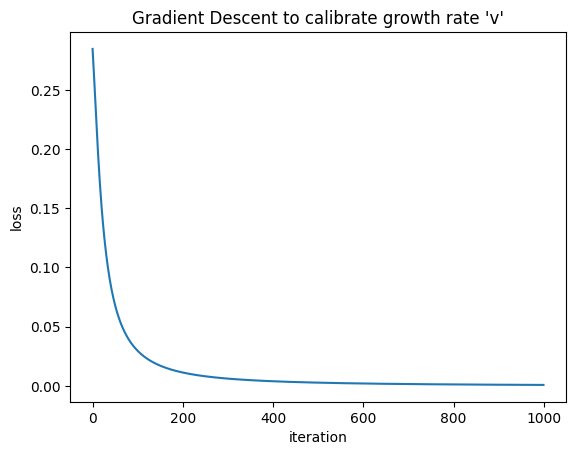

In [5]:
# Plotting the losses of the gradient descent model used to calibrate growth rate, v
plt.plot(losses)
plt.xlabel("iteration")
plt.ylabel("loss")
plt.title("Gradient Descent to calibrate growth rate 'v'")

plt.show()